In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Meander_augmented.zip" -d "/content/"

Archive:  /content/drive/MyDrive/Meander_augmented.zip
   creating: /content/Meander_augmented/Healthy/
  inflating: /content/Meander_augmented/Healthy/HealthyMeander_original_mea1-H1.jpg_056c199b-8e54-4841-a024-b25dcc3bf6da.jpg  
  inflating: /content/Meander_augmented/Healthy/HealthyMeander_original_mea1-H1.jpg_1cc70381-cb08-4f6f-b724-14cb400c88e5.jpg  
  inflating: /content/Meander_augmented/Healthy/HealthyMeander_original_mea1-H1.jpg_22504cc3-2be5-4509-9288-2768f82c6e47.jpg  
  inflating: /content/Meander_augmented/Healthy/HealthyMeander_original_mea1-H1.jpg_5c3b2f4b-1518-4f0f-977e-22acadf01dfd.jpg  
  inflating: /content/Meander_augmented/Healthy/HealthyMeander_original_mea1-H1.jpg_5c504b8d-8321-4962-8a32-737b38682d19.jpg  
  inflating: /content/Meander_augmented/Healthy/HealthyMeander_original_mea1-H1.jpg_6637bafb-6132-4dfd-aec6-c6d08ca38baa.jpg  
  inflating: /content/Meander_augmented/Healthy/HealthyMeander_original_mea1-H1.jpg_a4a03a84-e84b-4ab8-ba5c-b36464ed894e.jpg  
  infla

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import tqdm

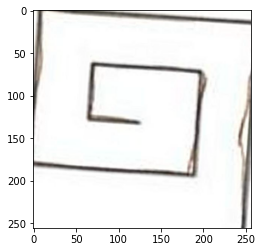

In [ ]:
data_path = '/content/Meander_augmented'
categories = ['Healthy', 'Patient']
for category in categories:
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (256, 256))
    plt.imshow(new_array, cmap='gray')
    # plt.show()
    break
  break

In [ ]:
IMG_SIZE = 128

training_set = []

for category in categories:
  path = os.path.join(data_path, category)
  index = categories.index(category)
  for img in os.listdir(path)[:3000]:
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_set.append([new_array, index])
    except Exception as e:
        pass

In [ ]:
import random
random.shuffle(training_set)

In [ ]:
X_train = []
y_train = []

for img_array, label in training_set:
  X_train.append(img_array)
  y_train.append(label)

In [ ]:
X_train =  np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

In [ ]:
X_train = X_train/255.0

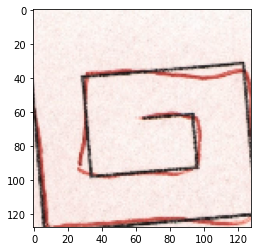

In [ ]:
plt.imshow(X_train[1], cmap='gray')

In [ ]:
X_train.shape

(2000, 128, 128, 3)

In [ ]:
y_train.shape

(2000,)

In [ ]:
# import pickle

# pickle_out = open('X_spiral_PD.pickle' , 'wb')
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open('y_spiral_PD.pickle' , 'wb')
# pickle.dump(y_train, pickle_out)
# pickle_out.close()

In [ ]:
import tensorflow
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


np.random.seed(42)

SIZE=128
# img_data=[]

# img=cv2.imread('images/monalisa.jpg', 1)   #Change 1 to 0 for grey images
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
# img=cv2.resize(img,(SIZE, SIZE))
# img_data.append(img_to_array(img))

# img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
# img_array = img_array.astype('float32') / 255.


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0

In [ ]:
model.fit(X_train, X_train, epochs=100)

Epoch 1/100
63/63 [==============================] - 11s 34ms/step - loss: 0.1522 - accuracy: 0.6381
Epoch 2/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0364 - accuracy: 0.8266
Epoch 3/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0271 - accuracy: 0.8081
Epoch 4/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0225 - accuracy: 0.8030
Epoch 5/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0203 - accuracy: 0.8251
Epoch 6/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0187 - accuracy: 0.8412
Epoch 7/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0173 - accuracy: 0.8598
Epoch 8/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0163 - accuracy: 0.8773
Epoch 9/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0156 - accuracy: 0.8816
Epoch 10/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0150 - accuracy: 0.884

Neural network output


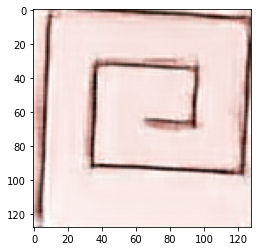

In [ ]:
print("Neural network output")
pred = model.predict(X_train[0].reshape(-1, IMG_SIZE,IMG_SIZE, 3))



plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

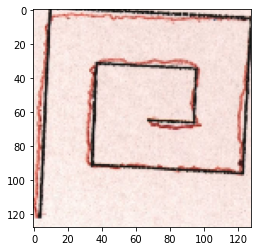

In [ ]:
plt.imshow(X_train[0])

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0

In [ ]:
new_model = Sequential()
for layer in model.layers[:7]:
  print(layer)
  new_model.add(layer)

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)       

In [ ]:
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
new_model.add(Flatten())
new_model.add(Dense(64))
new_model.add(Activation('relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(1))
new_model.add(Activation('sigmoid'))

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)       

In [ ]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_model.fit(X_train, y_train,epochs=200, validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 2s 16ms/step - loss: 0.6927 - accuracy: 0.5500 - val_loss: 0.6305 - val_accuracy: 0.6400
Epoch 2/200
50/50 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6050 - val_loss: 0.6313 - val_accuracy: 0.7500
Epoch 3/200
50/50 [==============================] - 0s 9ms/step - loss: 0.6169 - accuracy: 0.6675 - val_loss: 0.6221 - val_accuracy: 0.6550
Epoch 4/200
50/50 [==============================] - 0s 9ms/step - loss: 0.5822 - accuracy: 0.7175 - val_loss: 0.5564 - val_accuracy: 0.7025
Epoch 5/200
50/50 [==============================] - 0s 9ms/step - loss: 0.5444 - accuracy: 0.7500 - val_loss: 0.5194 - val_accuracy: 0.8050
Epoch 6/200
50/50 [==============================] - 0s 9ms/step - loss: 0.5154 - accuracy: 0.7625 - val_loss: 0.4804 - val_accuracy: 0.8075
Epoch 7/200
50/50 [==============================] - 0s 9ms/step - loss: 0.4734 - accuracy: 0.7969 - val_loss: 0.4546 - val_accuracy: 0.8075
Epoch 8/200
